# Loan Bank Eligibility Prediction


## Introduction
This project focuses on building a classification model to predict the credit eligibility of clients using a dataset from a bank. The goal is to create a scoring system that evaluates the likelihood of repayment and assists in minimizing risk while maximizing profit.

### Objectives:
- Perform exploratory data analysis and preprocessing.
- Train multiple machine learning models and optimize them using hyperparameter tuning.
- Evaluate model performance and export the best-performing model for future use.


## Phase 1: Theoretical Exploration


### Cross-validation and Hyperparameter Tuning
- **Cross-validation** is a technique for assessing how well a model will generalize to an independent dataset.
- **Hyperparameter tuning** optimizes model parameters to improve performance.
    - **GridSearchCV**: Exhaustive search over a grid of hyperparameters.
    - **RandomizedSearchCV**: Random sampling of hyperparameter combinations.


In [22]:
# Basic libraries
import pandas as pd
import numpy as np

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
import os
import matplotlib.pyplot as plt



## Phase 2: Data Exploration



1. **Loaded the Dataset**:
   - The loan dataset was read from the specified file location.

2. **Split the Data**:
   - The dataset was split into two parts:
     - **Training Data (80%)**: Used for building and training machine learning models.
     - **Testing Data (20%)**: Reserved for validating the model's performance.

3. **Saved the Splits**:
   - The training data was saved as `data_working.csv`.
   - The testing data was saved as `data_raw.csv`.


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Correct file path
file_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\loan-data.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Split the data
data_working, data_raw = train_test_split(data, test_size=0.2, random_state=42)

# Save the splits into two separate CSV files
data_working_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_working.csv'
data_raw_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_raw.csv'

data_working.to_csv(data_working_path, index=False)
data_raw.to_csv(data_raw_path, index=False)

print(f"Data saved:\nWorking Data: {data_working_path}\nRaw Data: {data_raw_path}")


Data saved:
Working Data: C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_working.csv
Raw Data: C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_raw.csv


### Load the csv and first observations

In [24]:

# path to the working data CSV
working_data_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_working.csv'

# Load the working data
data_working = pd.read_csv(working_data_path)

# Explore the data
print("General Information:")
print(data_working.info())

print("\nMissing Values:")
print(data_working.isnull().sum())

print("\nDescriptive Statistics:")
print(data_working.describe())


General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            784 non-null    object 
 1   Gender             766 non-null    object 
 2   Married            781 non-null    object 
 3   Dependents         764 non-null    object 
 4   Education          784 non-null    object 
 5   Self_Employed      739 non-null    object 
 6   ApplicantIncome    784 non-null    int64  
 7   CoapplicantIncome  784 non-null    float64
 8   LoanAmount         761 non-null    float64
 9   Loan_Amount_Term   769 non-null    float64
 10  Credit_History     726 non-null    float64
 11  Property_Area      784 non-null    object 
 12  Loan_Status        489 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 79.8+ KB
None

Missing Values:
Loan_ID                0
Gender                18
Married            

# Dataset Observations 

## Dataset Overview
- **Total Rows:** 784
- **Total Columns:** 13
- **Data Types:**
  - **Numeric Columns (5):** `ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`, `Credit_History`.
  - **Categorical Columns (8):** `Loan_ID`, `Gender`, `Married`, `Dependents`, `Education`, `Self_Employed`, `Property_Area`, `Loan_Status`.
- **Target Variable:** `Loan_Status` (indicates loan approval).

---

## Key Observations

### Missing Values:
- `Gender`: 18 missing.
- `Married`: 3 missing.
- `Dependents`: 20 missing.
- `Self_Employed`: 45 missing.
- `LoanAmount`: 23 missing.
- `Loan_Amount_Term`: 15 missing.
- `Credit_History`: 58 missing.
- `Loan_Status` (Target Variable): 295 missing.

### Data Imbalance:
- **Categorical Features:**
  - `Credit_History`: Dominated by `1.0` values.
  - `Property_Area`: Needs further analysis to check for imbalance.
- **Target Variable:** `Loan_Status` has missing values, which will affect supervised learning.

### Column Details:
- **Numerical Columns:**
  - `ApplicantIncome`, `CoapplicantIncome`: No missing values but may require scaling.
  - `LoanAmount`: Contains 23 missing values and may have a skewed distribution.
  - `Loan_Amount_Term`: Contains 15 missing values.
  - `Credit_History`: Contains 58 missing values, mostly populated by `1.0`.
- **Categorical Columns:**
  - Features like `Gender`, `Married`, `Self_Employed`, and `Property_Area` have missing values that need imputation.
  - Encoding will be required for machine learning.

---

## Next Steps

1. **Handle Missing Values:**
   - Use appropriate imputation strategies for categorical and numerical columns.
   - Address missing values in `Loan_Status` (target variable) by either excluding rows or imputing based on patterns.

2. **Analyze Feature Distributions:**
   - Visualize distributions of numerical features (`ApplicantIncome`, `LoanAmount`, etc.) to identify skewness or outliers.
   - Check class distributions for categorical features to detect imbalances.

3. **Preprocessing:**
   - Normalize or standardize numerical columns to ensure consistent scaling.
   - Encode categorical columns to prepare for model training.
   - Consider feature engineering, such as creating new features (e.g., combining incomes).

4. **EDA Visualization:**
   - Visualize relationships between features and `Loan_Status` using plots.
   - Use bar plots to explore how categorical variables relate to `Loan_Status`.

5. **Train-Test Split:**
   - Ensure the dataset is cleaned and preprocessed before splitting into training and testing subsets.


In [25]:

# Check for unique values and missing values
unique_values = data_working.nunique()
low_unique_columns = unique_values[unique_values <= 1]
missing_percentage = (data_working.isnull().sum() / len(data_working)) * 100
high_missing_columns = missing_percentage[missing_percentage > 50]

# Display results
print("Columns with very low unique values:")
print(low_unique_columns)

print("\nColumns with high percentage of missing values:")
print(high_missing_columns)


Columns with very low unique values:
Series([], dtype: int64)

Columns with high percentage of missing values:
Series([], dtype: float64)


### Columns with Very Low Unique Values:

No columns have a single unique value or very low variability. This means all columns potentially contribute some variation to the dataset and might be relevant for analysis.
Columns with High Percentage of Missing Values:

No columns have more than 50% missing values. This suggests that all columns contain enough data to be included in the analysis with appropriate imputation for missing value

### Visualize missing values

C:\Users\khrib\AppData\Local\Temp\ipykernel_10604\3584083997.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


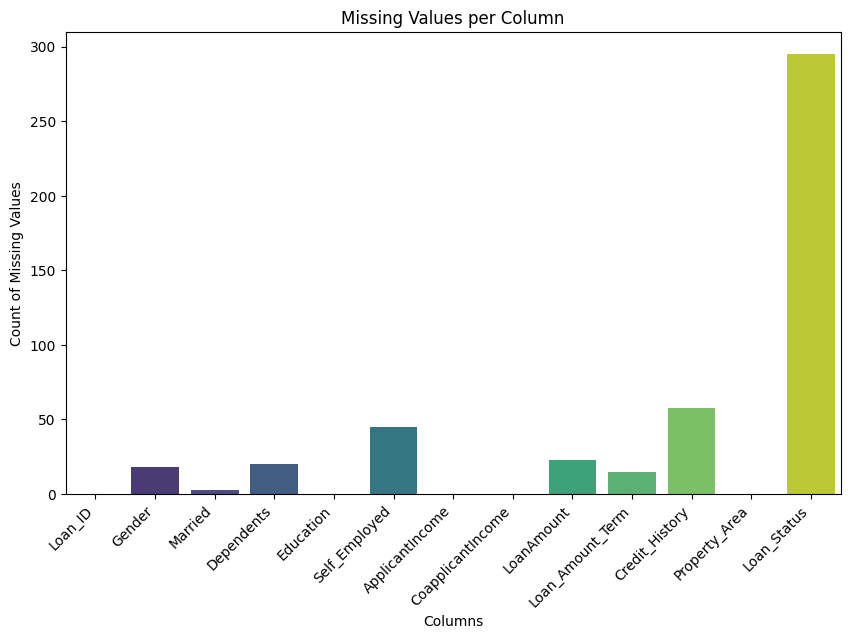

Missing Value Percentage:



(None,
 Loan_ID               0.000000
 Gender                2.295918
 Married               0.382653
 Dependents            2.551020
 Education             0.000000
 Self_Employed         5.739796
 ApplicantIncome       0.000000
 CoapplicantIncome     0.000000
 LoanAmount            2.933673
 Loan_Amount_Term      1.913265
 Credit_History        7.397959
 Property_Area         0.000000
 Loan_Status          37.627551
 dtype: float64)

In [26]:
plt.figure(figsize=(10, 6))
missing_values = data_working.isnull().sum()
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")
plt.show()

# Display missing value percentages
missing_percentage = (data_working.isnull().sum() / len(data_working)) * 100
print("Missing Value Percentage:\n"), missing_percentage

### Separate Numerical and Categorical Columns

In [27]:
# Separate categorical and numerical columns
categorical_columns = data_working.select_dtypes(include=['object']).columns
numerical_columns = data_working.select_dtypes(include=['int64', 'float64']).columns

# Display columns
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)


Categorical Columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')
Numerical Columns: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


### Explore Categorical Columns

In [28]:
print("Categorical Columns Exploration:")
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(data_working[col].value_counts(dropna=False))
    print(f"Missing Values: {data_working[col].isnull().sum()} ({(data_working[col].isnull().mean() * 100):.2f}%)")


Categorical Columns Exploration:

Column: Loan_ID
Loan_ID
LP001350    1
LP002969    1
LP001082    1
LP002774    1
LP001098    1
           ..
LP001742    1
LP002086    1
LP002755    1
LP002530    1
LP001211    1
Name: count, Length: 784, dtype: int64
Missing Values: 0 (0.00%)

Column: Gender
Gender
Male      622
Female    144
NaN        18
Name: count, dtype: int64
Missing Values: 18 (2.30%)

Column: Married
Married
Yes    509
No     272
NaN      3
Name: count, dtype: int64
Missing Values: 3 (0.38%)

Column: Dependents
Dependents
0      427
2      138
1      123
3+      76
NaN     20
Name: count, dtype: int64
Missing Values: 20 (2.55%)

Column: Education
Education
Graduate        613
Not Graduate    171
Name: count, dtype: int64
Missing Values: 0 (0.00%)

Column: Self_Employed
Self_Employed
No     645
Yes     94
NaN     45
Name: count, dtype: int64
Missing Values: 45 (5.74%)

Column: Property_Area
Property_Area
Urban        281
Semiurban    271
Rural        232
Name: count, dtype: int6

### Explore Numerical Columns

In [29]:
print("\nNumerical Columns Exploration:")
for col in numerical_columns:
    print(f"\nColumn: {col}")
    print(data_working[col].describe())
    print(f"Missing Values: {data_working[col].isnull().sum()} ({(data_working[col].isnull().mean() * 100):.2f}%)")



Numerical Columns Exploration:

Column: ApplicantIncome
count      784.000000
mean      5325.243622
std       6192.326967
min          0.000000
25%       2849.500000
50%       3810.000000
75%       5669.500000
max      81000.000000
Name: ApplicantIncome, dtype: float64
Missing Values: 0 (0.00%)

Column: CoapplicantIncome
count      784.000000
mean      1619.170816
std       2939.614697
min          0.000000
25%          0.000000
50%       1012.000000
75%       2330.750000
max      41667.000000
Name: CoapplicantIncome, dtype: float64
Missing Values: 0 (0.00%)

Column: LoanAmount
count    761.000000
mean     144.060447
std       83.206301
min        9.000000
25%      100.000000
50%      125.000000
75%      162.000000
max      700.000000
Name: LoanAmount, dtype: float64
Missing Values: 23 (2.93%)

Column: Loan_Amount_Term
count    769.000000
mean     341.659298
std       66.728332
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Lo

### Visualization of Key Relationships

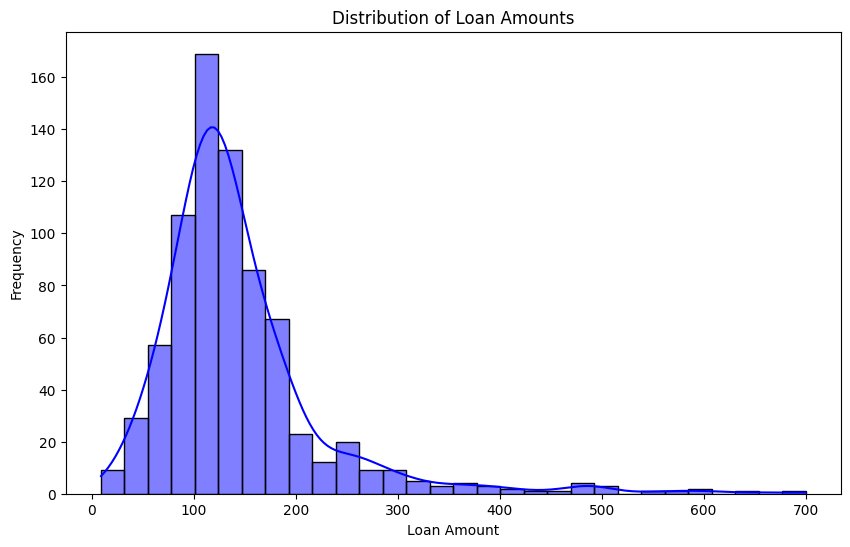

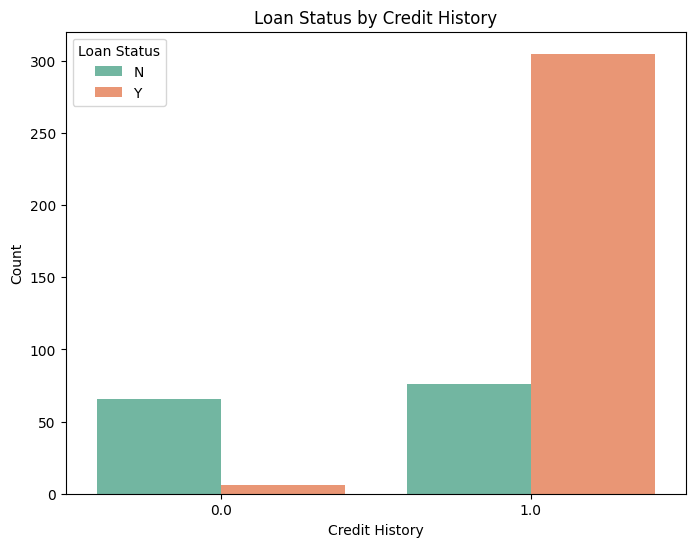

In [30]:
# Example: LoanAmount distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_working['LoanAmount'], kde=True, bins=30, color="blue")
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

# Example: Credit History vs Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(x="Credit_History", hue="Loan_Status", data=data_working, palette="Set2")
plt.title("Loan Status by Credit History")
plt.xlabel("Credit History")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()


 ### Categorical Variable Distributions

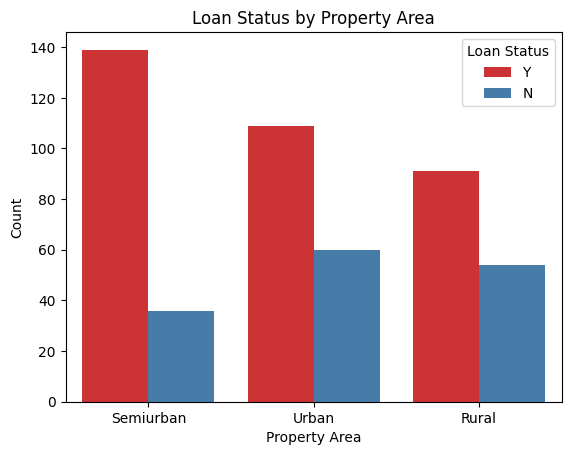

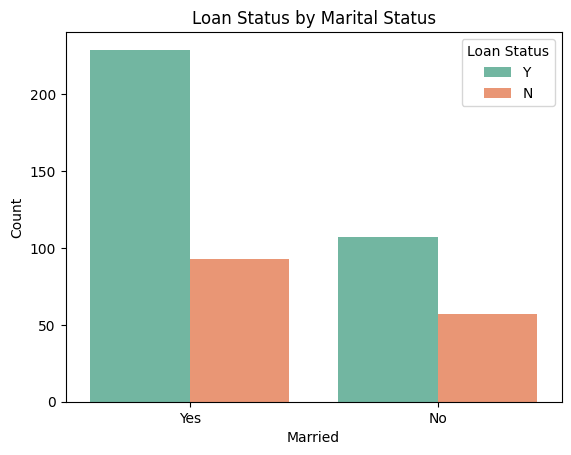

In [31]:
# Property Area vs Loan Status
sns.countplot(x="Property_Area", hue="Loan_Status", data=data_working, palette="Set1")
plt.title("Loan Status by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()

# Married vs Loan Status
sns.countplot(x="Married", hue="Loan_Status", data=data_working, palette="Set2")
plt.title("Loan Status by Marital Status")
plt.xlabel("Married")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()


### Numerical Distributions

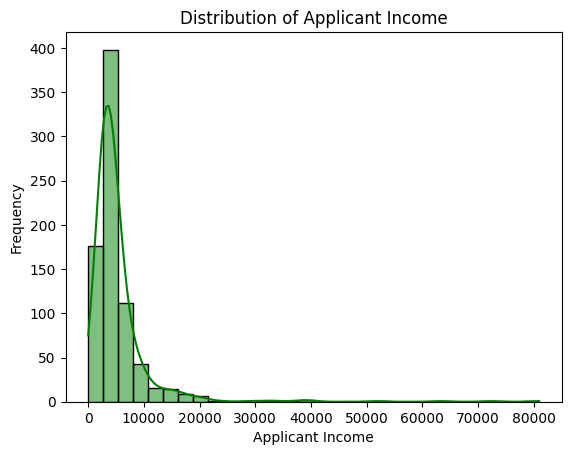

C:\Users\khrib\AppData\Local\Temp\ipykernel_10604\2102964183.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Education", y="LoanAmount", data=data_working, palette="Set3")


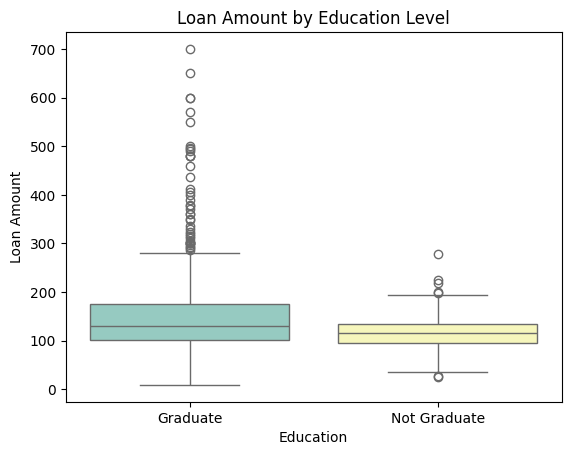

In [32]:
# Distribution of Applicant Income
sns.histplot(data_working['ApplicantIncome'], kde=True, bins=30, color="green")
plt.title("Distribution of Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

# Loan Amount by Education
sns.boxplot(x="Education", y="LoanAmount", data=data_working, palette="Set3")
plt.title("Loan Amount by Education Level")
plt.xlabel("Education")
plt.ylabel("Loan Amount")
plt.show()


### Target Variable Analysis

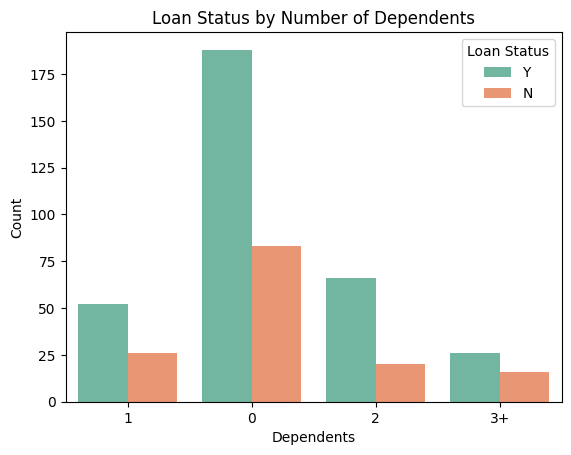

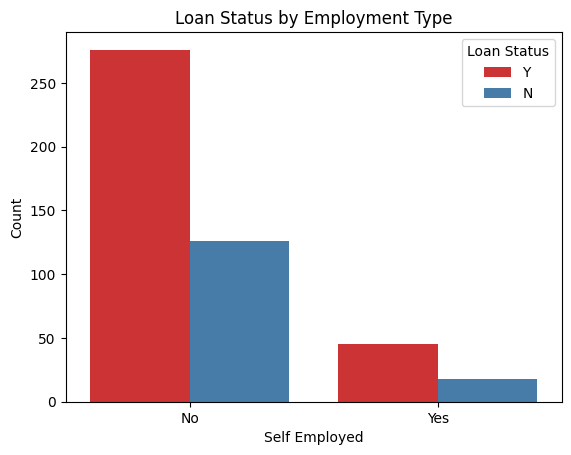

In [33]:
# Dependents vs Loan Status
sns.countplot(x="Dependents", hue="Loan_Status", data=data_working, palette="Set2")
plt.title("Loan Status by Number of Dependents")
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()

# Self Employed vs Loan Status
sns.countplot(x="Self_Employed", hue="Loan_Status", data=data_working, palette="Set1")
plt.title("Loan Status by Employment Type")
plt.xlabel("Self Employed")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()


### Observations after viz
#### From Categorical Columns
Loan_ID:

Unique for every entry, does not contribute to prediction. Recommendation: Drop this column.
Gender:

Some missing values (~2.3%).
Dominated by "Male". Recommendation: Impute missing values with the mode ("Male").
Married:

Missing values observed (~0.38%).
Strong impact on Loan_Status from the visualization. Recommendation: Impute with the mode ("Yes").
Dependents:

Missing values (~2.55%).
Loan approvals differ based on dependency levels. Recommendation: Impute missing values and analyze as an important feature.
Self_Employed:

Missing values (~5.73%).
Majority "No". Loan approvals vary between employed/self-employed. Recommendation: Impute with the mode ("No").
Property_Area:

Significant impact on Loan_Status. Recommendation: Keep as is, no missing values.
Loan_Status:

Target variable, but has missing values (~37.62%).
Recommendation: Handle missing values carefully. Missing rows may need removal since imputation might introduce bias.

#### From Numerical Columns

ApplicantIncome:

High variance, with outliers (maximum value is much higher than 75th percentile).
Skewed distribution. Recommendation: Normalize or apply log transformation.
CoapplicantIncome:

Many entries have 0.0. Potential cases of single applicants.
Skewed data. Recommendation: Combine with ApplicantIncome to create TotalIncome for better representation.
LoanAmount:

Missing values (~2.93%).
Outliers are present. Recommendation: Impute missing values using the median and apply scaling or log transformation.
Loan_Amount_Term:

Missing values (~1.91%).
Majority (~360 months). Recommendation: Impute missing values with the mode (360).
Credit_History:

Missing values (~7.40%).
Strong correlation with Loan_Status. Recommendation: Impute missing values with mode (1.0) as it strongly affects approvals.

### Steps to Take based on observations

#### 1. Data Cleaning

Drop Loan_ID: It does not provide predictive power.
Impute Missing Values:
Categorical Columns:
Gender: Mode.
Married: Mode.
Dependents: Mode.
Self_Employed: Mode.
Credit_History: Mode.
Numerical Columns:
LoanAmount: Median.
Loan_Amount_Term: Mode.

#### 2. Feature Engineering

Combine Income Columns:
Create TotalIncome = ApplicantIncome + CoapplicantIncome.
Transformations:
Apply log transformation to TotalIncome and LoanAmount to reduce skewness.

#### 3. Visualize Key Relationships

Explore:
Correlation heatmap to identify significant features.
Relationships between TotalIncome, LoanAmount, and Loan_Status.

#### 4. Prepare Data for Modeling

Normalize or standardize numerical features.
Encode categorical variables using one-hot encoding or label encoding.

#### 5. Handle Outliers

Use visualization (boxplots, histograms) to detect and address outliers in numerical features.


## Phase 3: Data Preprocessing

### Data Cleaning :involves dropping irrelevant columns and imputing missing values.

In [34]:

# Step 2: Drop the `Loan_ID` column
data_cleaned = data_working.drop(columns=['Loan_ID'])

# Step 3: Impute missing values for categorical columns
categorical_imputations = {
    'Gender': data_cleaned['Gender'].mode()[0],
    'Married': data_cleaned['Married'].mode()[0],
    'Dependents': data_cleaned['Dependents'].mode()[0],
    'Self_Employed': data_cleaned['Self_Employed'].mode()[0],
    'Credit_History': data_cleaned['Credit_History'].mode()[0],
}
data_cleaned.fillna(value=categorical_imputations, inplace=True)

# Step 4: Impute missing values for numerical columns
data_cleaned['LoanAmount'].fillna(data_cleaned['LoanAmount'].median(), inplace=True)
data_cleaned['Loan_Amount_Term'].fillna(data_cleaned['Loan_Amount_Term'].mode()[0], inplace=True)

# Step 5: Drop rows where `Loan_Status` is missing and map `Loan_Status` to binary values
data_cleaned = data_cleaned.dropna(subset=['Loan_Status'])  # Remove rows with missing `Loan_Status`
data_cleaned['Loan_Status'] = data_cleaned['Loan_Status'].map({'Y': 1, 'N': 0})  # Map 'Y' to 1 and 'N' to 0

# Step 6: Display summary of cleaned data
print("Data Cleaning and Loan_Status Adjustment Completed. Summary:")
print(data_cleaned.info())


Data Cleaning and Loan_Status Adjustment Completed. Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 489 entries, 3 to 783
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             489 non-null    object 
 1   Married            489 non-null    object 
 2   Dependents         489 non-null    object 
 3   Education          489 non-null    object 
 4   Self_Employed      489 non-null    object 
 5   ApplicantIncome    489 non-null    int64  
 6   CoapplicantIncome  489 non-null    float64
 7   LoanAmount         489 non-null    float64
 8   Loan_Amount_Term   489 non-null    float64
 9   Credit_History     489 non-null    float64
 10  Property_Area      489 non-null    object 
 11  Loan_Status        489 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 49.7+ KB
None


C:\Users\khrib\AppData\Local\Temp\ipykernel_10604\553165565.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['LoanAmount'].fillna(data_cleaned['LoanAmount'].median(), inplace=True)
C:\Users\khrib\AppData\Local\Temp\ipykernel_10604\553165565.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

### Feature Engineering :Combine incomes and apply transformations to reduce skewness.

In [35]:

# Create `TotalIncome` as the sum of `ApplicantIncome` and `CoapplicantIncome`
data_cleaned['TotalIncome'] = data_cleaned['ApplicantIncome'] + data_cleaned['CoapplicantIncome']

# Apply log transformation to reduce skewness
import numpy as np
data_cleaned['Log_TotalIncome'] = np.log1p(data_cleaned['TotalIncome'])  # log1p to handle zeros safely
data_cleaned['Log_LoanAmount'] = np.log1p(data_cleaned['LoanAmount'])

# Display the transformed features
print(data_cleaned[['TotalIncome', 'Log_TotalIncome', 'Log_LoanAmount']].head())


   TotalIncome  Log_TotalIncome  Log_LoanAmount
3       5167.0         8.550241        4.744932
4       3167.0         8.060856        4.317488
6       6033.0         8.705165        5.081404
8      17263.0         9.756379        5.420535
9       3463.0         8.150179        4.812184


### Visualize Key Relationships

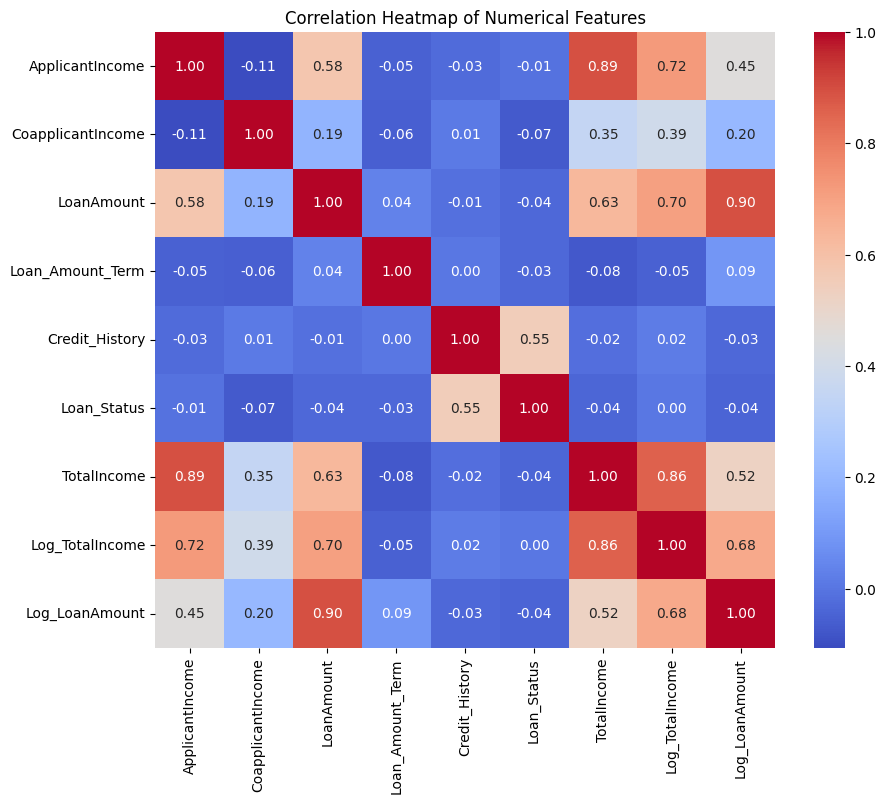

In [36]:
# Step 3: Visualize Key Relationships 
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for the correlation matrix
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_cleaned[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()



### Prepare Data for Modeling 
Normalize or standardize numerical features and encode categorical variables.

In [37]:
# Step 4: Prepare Data for Modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Normalize numerical features
scaler = StandardScaler()
data_cleaned[['Normalized_TotalIncome', 'Normalized_LoanAmount']] = scaler.fit_transform(
    data_cleaned[['TotalIncome', 'LoanAmount']]
)

# Encode categorical variables using LabelEncoder
label_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in label_columns:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])

# Display the prepared data
print("Data Prepared for Modeling:")
print(data_cleaned.head())


Data Prepared for Modeling:
   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
3       1        1           0          0              0             3500   
4       1        0           0          0              0             3167   
6       1        1           0          1              0             6033   
8       0        0           0          1              1            17263   
9       0        0           0          0              1             3463   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
3             1667.0       114.0             360.0             1.0   
4                0.0        74.0             360.0             1.0   
6                0.0       160.0             360.0             1.0   
8                0.0       225.0             360.0             1.0   
9                0.0       122.0             360.0             1.0   

   Property_Area  Loan_Status  TotalIncome  Log_TotalIncome  Log_LoanAmount  \
3        

### Step 5: Handle Outliers

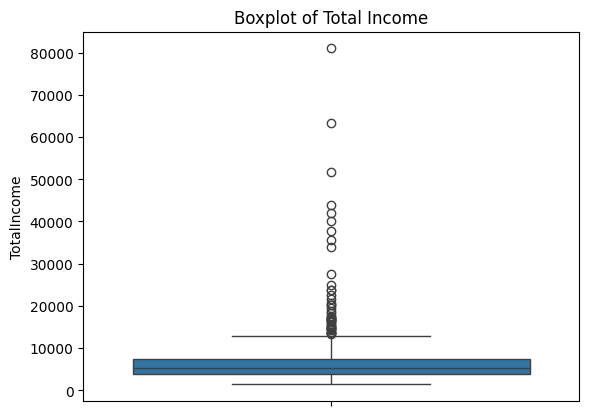

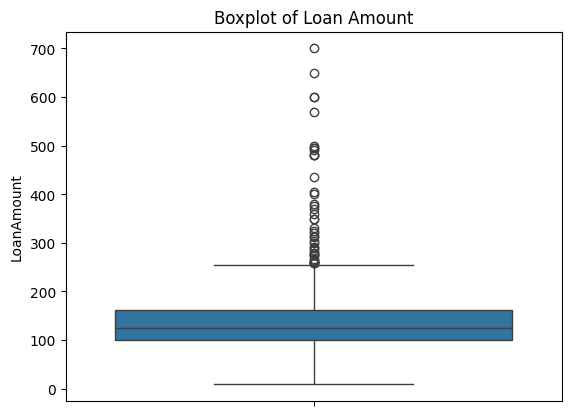

In [38]:

# Boxplot for TotalIncome
sns.boxplot(data_cleaned['TotalIncome'])
plt.title("Boxplot of Total Income")
plt.show()

# Boxplot for LoanAmount
sns.boxplot(data_cleaned['LoanAmount'])
plt.title("Boxplot of Loan Amount")
plt.show()

# Optionally remove or cap outliers based on thresholds
q1 = data_cleaned['TotalIncome'].quantile(0.25)
q3 = data_cleaned['TotalIncome'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove or cap outliers
data_cleaned['TotalIncome'] = np.where(data_cleaned['TotalIncome'] > upper_bound, upper_bound,
                                       np.where(data_cleaned['TotalIncome'] < lower_bound, lower_bound,
                                                data_cleaned['TotalIncome']))

#### Final Preprocessing 
##### 1-Drop features that are redundant or not useful:
ApplicantIncome and CoapplicantIncome (replaced by TotalIncome).
LoanAmount (replaced by Log_LoanAmount).
##### 2. Normalize and Encode
Ensure all features are normalized or standardized.
Confirm all categorical features are encoded.

In [39]:
# Drop redundant features based on the correlation heat map
data_final = data_cleaned.drop(columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])

# Final dataset preview
print("Final Features for Modeling:")
print(data_final.head())

# Save the preprocessed dataset for modeling
final_data_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_preprocessed.csv'
data_final.to_csv(final_data_path, index=False)

print(f"Preprocessed data saved to: {final_data_path}")


Final Features for Modeling:
   Gender  Married  Dependents  Education  Self_Employed  Loan_Amount_Term  \
3       1        1           0          0              0             360.0   
4       1        0           0          0              0             360.0   
6       1        1           0          1              0             360.0   
8       0        0           0          1              1             360.0   
9       0        0           0          0              1             360.0   

   Credit_History  Property_Area  Loan_Status  TotalIncome  Log_TotalIncome  \
3             1.0              1            1       5167.0         8.550241   
4             1.0              2            0       3167.0         8.060856   
6             1.0              2            0       6033.0         8.705165   
8             1.0              1            1      12893.0         9.756379   
9             1.0              2            1       3463.0         8.150179   

   Log_LoanAmount  Normaliz

## Phase 4: Model Training and Evaluation

Accuracy: 0.7244897959183674

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.43      0.49        30
           1       0.77      0.85      0.81        68

    accuracy                           0.72        98
   macro avg       0.67      0.64      0.65        98
weighted avg       0.71      0.72      0.71        98



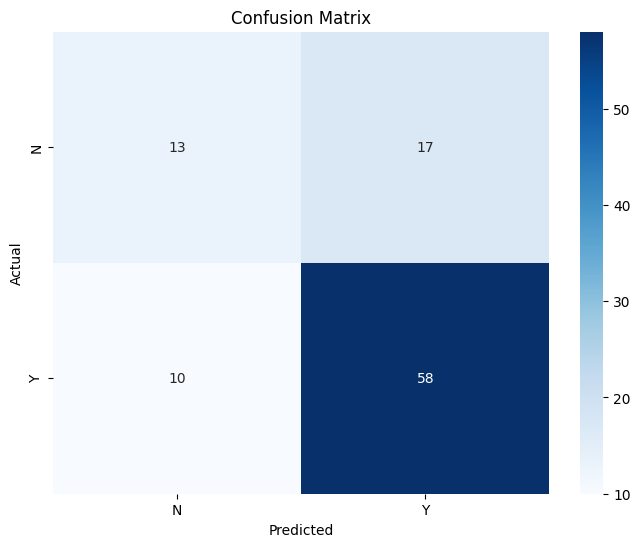

In [40]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed dataset
preprocessed_data_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_preprocessed.csv'
data_final = pd.read_csv(preprocessed_data_path)

# Split the data
X = data_final.drop(columns=['Loan_Status'])
y = data_final['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### Explanation of the Results
Confusion Matrix:

True Positives (TP): 58 (Correctly predicted "Y").
True Negatives (TN): 13 (Correctly predicted "N").
False Positives (FP): 17 (Predicted "Y" but actual is "N").
False Negatives (FN): 10 (Predicted "N" but actual is "Y").
Accuracy: 0.724 (~72.4%)

This means the model correctly classified 72.4% of the instances in the test set.
Precision:

Precision for 0 (N): 0.57 (Out of all predicted "N", 57% were correct).
Precision for 1 (Y): 0.77 (Out of all predicted "Y", 77% were correct).
Recall:

Recall for 0 (N): 0.43 (Out of all actual "N", only 43% were correctly predicted).
Recall for 1 (Y): 0.85 (Out of all actual "Y", 85% were correctly predicted).
F1-Score:

A balance between precision and recall.
F1 for 0 (N): 0.49 (Low due to poor recall).
F1 for 1 (Y): 0.81 (High because of strong recall).
Macro Average: 0.67 (Unweighted mean of F1-scores for all classes).

Weighted Average: 0.71 (F1-score weighted by class support).

Insights
The model performs well in predicting "Y" (approved loans) but struggles with "N" (rejected loans), evident in its lower recall for class 0.
This could indicate class imbalance, even after SMOTE. Further hyperparameter tuning or a different model may improve performance.

### GridSearchCV and Cross-Validation

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\data\simplon_dev_ia_projects\projet_notebooks\classification\env\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.861943594971118
Accuracy: 0.7448979591836735

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.40      0.49        30
           1       0.77      0.90      0.83        68

    accuracy                           0.74        98
   macro avg       0.70      0.65      0.66        98
weighted avg       0.73      0.74      0.73        98



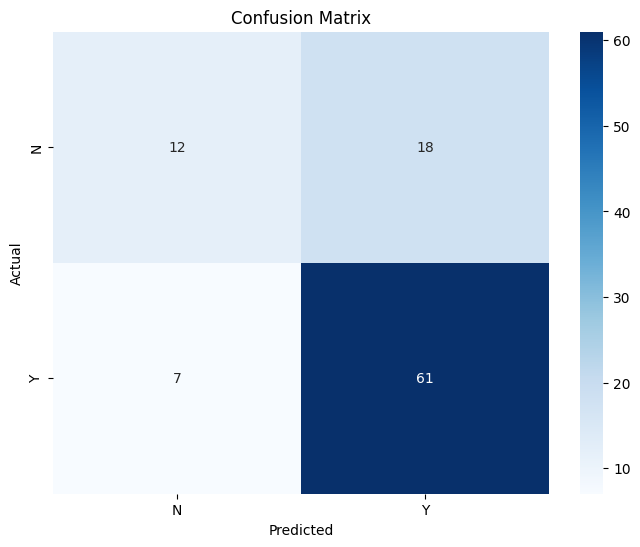

In [43]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# GridSearch with Cross-Validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and estimator
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the best model
best_clf = grid_search.best_estimator_
best_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
y_pred = best_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




#### Analysis of the Results
1. Best Parameters
criterion: 'entropy': The model splits data based on information gain (entropy) for higher information content at each split.
max_depth: None: No limit on the depth of the tree, allowing the tree to grow until all leaves are pure or other stopping criteria are met.
min_samples_leaf: 1: A leaf must have at least 1 sample to stop further splitting.
min_samples_split: 5: A node must have at least 5 samples to be considered for splitting.
n_estimators: 100: The model uses 100 decision trees in the forest.
2. Best Cross-Validation Score
Score: 0.862 (~86.2%)
Indicates that the model generalizes well during 5-fold cross-validation.
3. Test Set Evaluation
Accuracy: 0.745 (~74.5%)
The model correctly predicted ~74.5% of test set instances.
Precision:
Class 0 (N): 0.63 (63% of predicted "N" were correct).
Class 1 (Y): 0.77 (77% of predicted "Y" were correct).
Recall:
Class 0 (N): 0.40 (40% of actual "N" were correctly identified).
Class 1 (Y): 0.90 (90% of actual "Y" were correctly identified).
F1-Score:
Class 0 (N): 0.49 (indicates a balance between precision and recall but low due to poor recall).
Class 1 (Y): 0.83 (indicates good balance between precision and recall for class "Y").
Macro Avg:
Average of precision, recall, and F1 across all classes is lower due to the imbalance in class performance.
Weighted Avg:
Adjusted averages based on class support; slightly higher due to better performance on class "Y".
Insights
The model performs well for class 1 (Y) with high recall, meaning it correctly predicts most loan approvals.
However, the model struggles with class 0 (N):
Precision and recall are both low, likely due to class imbalance and feature interactions.
A balanced precision-recall trade-off for 1 (Y) suggests the model is reliable for predicting approvals but may need improvement for rejections.


#### RandomizedSearchCV

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 79}
Best Score: 0.8637614678899084
Accuracy: 0.7755102040816326

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.47      0.56        30
           1       0.79      0.91      0.85        68

    accuracy                           0.78        98
   macro avg       0.75      0.69      0.70        98
weighted avg       0.77      0.78      0.76        98



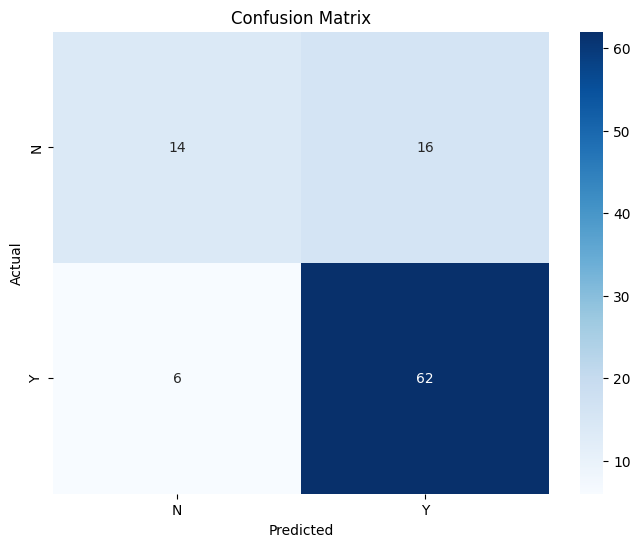

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),  # Number of trees
    'max_depth': [5, 10, 15, None],  # Maximum tree depth
    'min_samples_split': randint(2, 10),  # Minimum number of samples to split
    'min_samples_leaf': randint(1, 5),  # Minimum number of samples per leaf
    'criterion': ['gini', 'entropy']  # Splitting criteria
}

# Create the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=100,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Train the best model
best_clf = random_search.best_estimator_
best_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", report)

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### Analysis of the RandomizedSearchCV Results
1. Best Parameters
criterion: 'gini': The split criterion is Gini Impurity, which measures the probability of misclassification.
max_depth: 15: The tree is allowed to grow to a depth of 15, balancing complexity and overfitting.
min_samples_leaf: 2: A leaf node must have at least 2 samples.
min_samples_split: 6: A node must have at least 6 samples to consider splitting.
n_estimators: 79: The forest consists of 79 decision trees, providing robustness.
2. Cross-Validation Score
Best Cross-Validation Score: 0.864 (~86.4%)
Indicates that the optimized model generalizes well during training.
3. Test Set Evaluation
Accuracy: 0.776 (~77.6%)
The model correctly classified ~77.6% of the test set.
4. Classification Report
Precision:
Class 0 (N): 0.70 (70% of predicted "N" were correct).
Class 1 (Y): 0.79 (79% of predicted "Y" were correct).
Recall:
Class 0 (N): 0.47 (47% of actual "N" were correctly identified).
Class 1 (Y): 0.91 (91% of actual "Y" were correctly identified).
F1-Score:
Class 0 (N): 0.56 (moderate balance between precision and recall, low due to poor recall).
Class 1 (Y): 0.85 (good balance between precision and recall for approved loans).
Macro Average:
Precision, recall, and F1 across both classes are slightly lower due to poor performance on class 0.
Weighted Average:
Adjusted metrics weighted by class support.

 #### Use class_weight='balanced' in RandomForestClassifier

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 53}
Best Score: 0.861943594971118
Accuracy: 0.7244897959183674

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.40      0.47        30
           1       0.77      0.87      0.81        68

    accuracy                           0.72        98
   macro avg       0.67      0.63      0.64        98
weighted avg       0.71      0.72      0.71        98



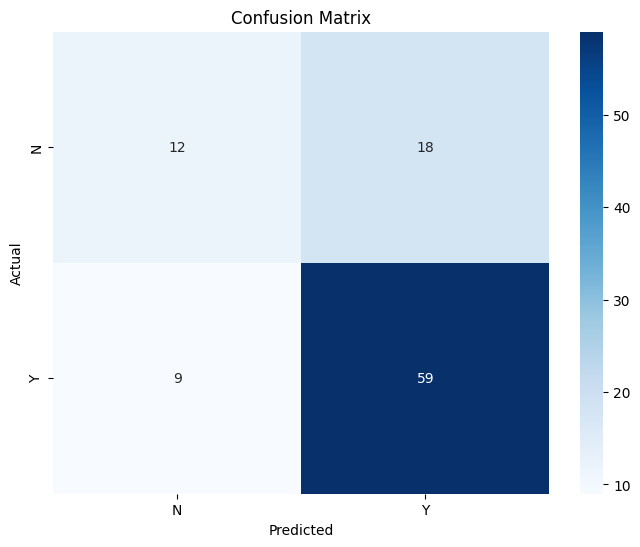

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),  # Number of trees
    'max_depth': [5, 10, 15, None],  # Maximum tree depth
    'min_samples_split': randint(2, 10),  # Minimum number of samples to split
    'min_samples_leaf': randint(1, 5),  # Minimum number of samples per leaf
    'criterion': ['gini', 'entropy']  # Splitting criteria
}

# Create the RandomForestClassifier with class_weight='balanced'
clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=200,  # Increased to 200 iterations for more combinations
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Train the best model
best_clf = random_search.best_estimator_
best_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", report)

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### Analysis of the Updated RandomizedSearchCV Results with class_weight='balanced'
1. Best Parameters
criterion: 'gini': Uses Gini Impurity to determine splits, aiming to maximize class separation.
max_depth: 15: Restricts the maximum depth of the trees to 15, preventing overfitting.
min_samples_leaf: 1: Each leaf must have at least one sample.
min_samples_split: 6: Nodes with fewer than 6 samples are not split further.
n_estimators: 53: A total of 53 decision trees are used in the forest.
2. Cross-Validation Score
Best Cross-Validation Score: 0.862 (~86.2%)
Indicates good generalization during training.
3. Test Set Performance
Accuracy: 0.724 (~72.4%)

The model correctly classified ~72.4% of the test data.
Precision:

Class 0 (N): 0.57 (57% of predicted "N" were correct).
Class 1 (Y): 0.77 (77% of predicted "Y" were correct).
Recall:

Class 0 (N): 0.40 (40% of actual "N" were correctly identified).
Class 1 (Y): 0.87 (87% of actual "Y" were correctly identified).
F1-Score:

Class 0 (N): 0.47 (low F1-score due to low recall for "N").
Class 1 (Y): 0.81 (strong F1-score due to high recall and precision for "Y").
Macro Avg:

Aggregates precision, recall, and F1 equally across both classes. The lower values indicate the performance imbalance between the two classes.
4. Confusion Matrix Insights
Class 0 (N):

12 correctly classified (True Negatives).
18 misclassified as Class 1 (False Positives).
Class 1 (Y):

59 correctly classified (True Positives).
9 misclassified as Class 0 (False Negatives).
Observations
Class Imbalance Persisting:

Despite class_weight='balanced', the model struggles to correctly predict Class 0 (N) (rejected loans). Recall for this class is only 40%.
Strength for Class 1 (Y):

The model maintains strong performance for Class 1, with high recall (87%) and F1-score (81%).
Overall Accuracy:

The accuracy remains consistent (~72%) compared to the previous results.


#### Implementation of SMOTE-Tomek (a combination of SMOTE for oversampling and Tomek links for undersampling)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 112}
Best Score: 0.8738095238095239
Accuracy: 0.7346938775510204

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.43      0.50        30
           1       0.78      0.87      0.82        68

    accuracy                           0.73        98
   macro avg       0.68      0.65      0.66        98
weighted avg       0.72      0.73      0.72        98



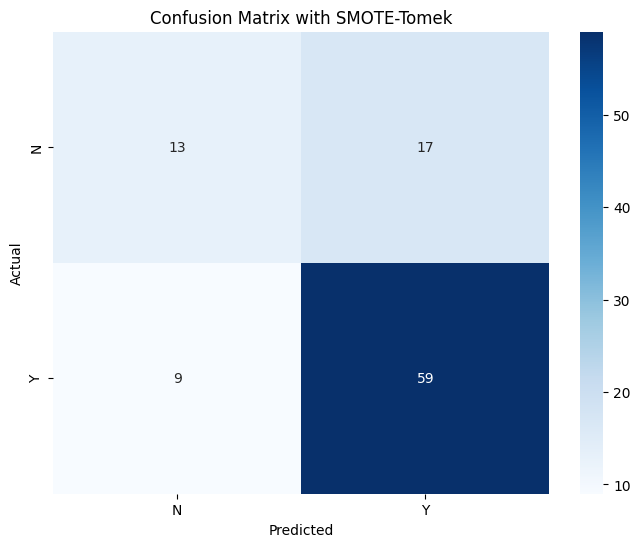

In [46]:
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint

# Step 1: Apply SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Step 2: Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),  # Number of trees
    'max_depth': [5, 10, 15, None],  # Maximum tree depth
    'min_samples_split': randint(2, 10),  # Minimum number of samples to split
    'min_samples_leaf': randint(1, 5),  # Minimum number of samples per leaf
    'criterion': ['gini', 'entropy']  # Splitting criteria
}

# Step 3: Create the RandomForestClassifier
clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Step 4: RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=200,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Step 5: Fit RandomizedSearchCV
random_search.fit(X_resampled, y_resampled)

# Step 6: Best parameters and model training
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
best_clf = random_search.best_estimator_

# Step 7: Evaluate on test set
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 8: Print results
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", report)

# Step 9: Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.title("Confusion Matrix with SMOTE-Tomek")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Phase 6: Exporting and Using the Model

In [42]:

# Export the best-performing model
# Example: Save model using pickle
# Demonstrate loading and using the model for new predictions


## Conclusions


### Summary
- **Key Findings**: Insights from the analysis and model performance.
- **Challenges**: Issues encountered during the project and solutions applied.
- **Future Recommendations**: Steps to further improve the model or extend the project scope.


## References

Cite resources, papers, and documentation used in this project.